4. Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.


In [26]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

file_path = r'E:\DSBDAL\4\boston_housing.csv'
df = pd.read_csv(file_path)

# 🖥️ Display the first few rows
print("Boston Housing Dataset Preview:\n", df.head())

Boston Housing Dataset Preview:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [27]:
# 🔍 Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())



Missing Values in Each Column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


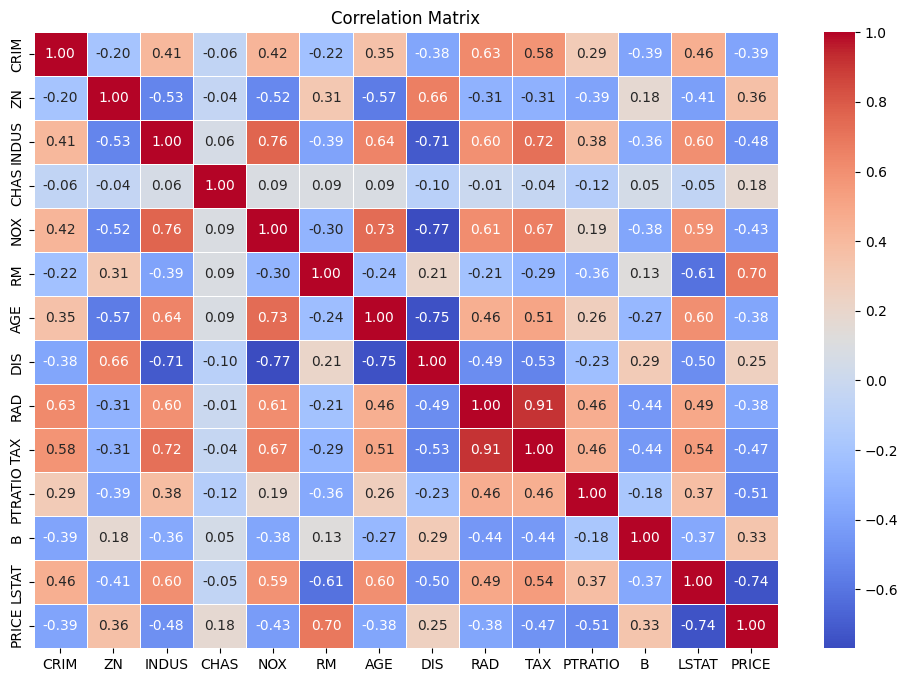

In [28]:
# 📊 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
# 🧾 Splitting features and target
X = df.drop(columns=['PRICE'])  # Independent variables
y = df['PRICE']                 # Target variable

In [31]:
# 🎲 Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# ⚖️ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
# 🧠 Model Creation and Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
# 🧮 Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [36]:
print("\n📈 Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


📈 Model Evaluation Metrics:
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R2) Score: 0.67


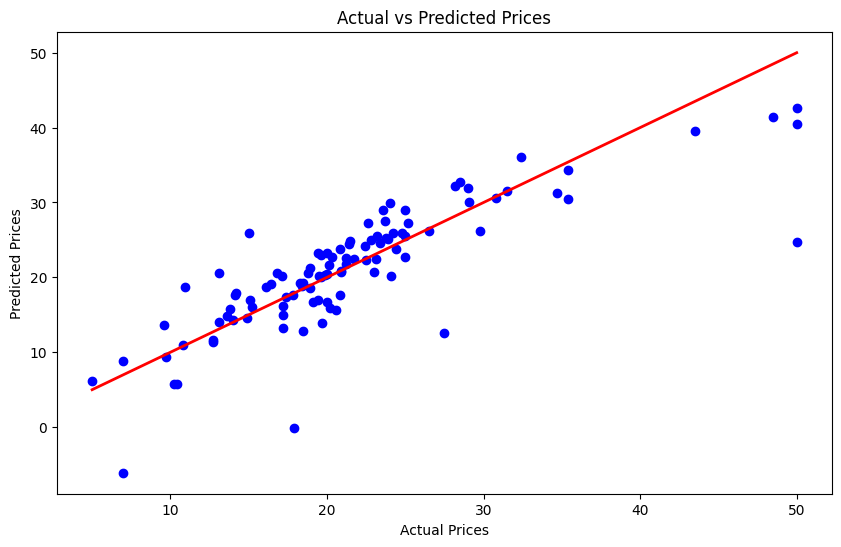

In [37]:
# 📉 Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

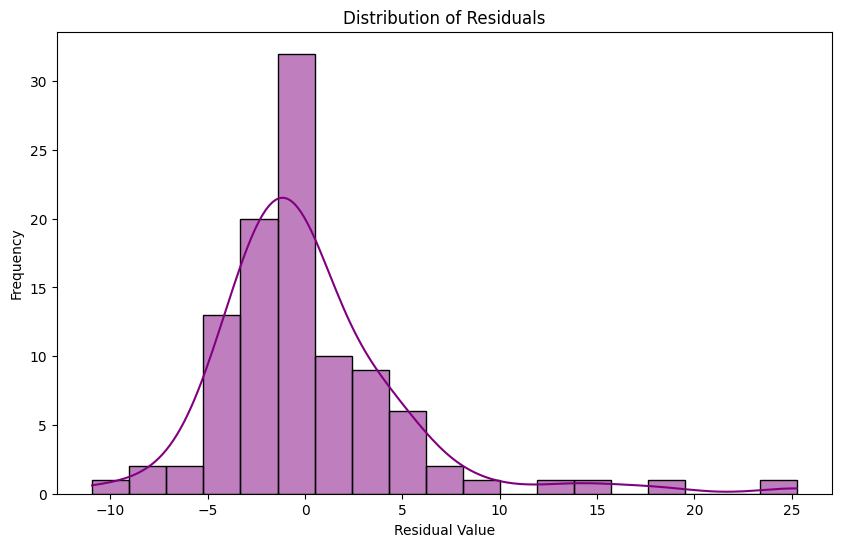

In [38]:
# 📊 Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

In [39]:
# 📌 Model Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n📌 Coefficients of the Model:\n", coefficients)


📌 Coefficients of the Model:
          Coefficient
CRIM       -1.002135
ZN          0.696269
INDUS       0.278065
CHAS        0.718738
NOX        -2.022319
RM          3.145240
AGE        -0.176048
DIS        -3.081908
RAD         2.251407
TAX        -1.767014
PTRATIO    -2.037752
B           1.129568
LSTAT      -3.611658


heory:
📌 What is Linear Regression?
Linear Regression is a supervised machine learning algorithm used to model the linear relationship between a dependent variable (target) and one or more independent variables (features).
The goal is to fit a straight line (regression line) that best predicts the target value from the input features.
Mathematically, for multiple variables:
y=β0​+β1​x1​+β2​x2​+⋯+βn​xn​+ε
Where:
y = predicted value (house price)
𝑥 1 , 𝑥 2 , … , 𝑥 𝑛 x 1 ​ ,x 2 ​ ,…,x n ​ = feature values (e.g., crime rate, number of rooms)
β 0 ​ = intercept\
𝛽 𝑖 β i ​ = coefficients (weights)
ε = error term

📊 Dataset Overview:
Dataset Used: Boston Housing Dataset (from Kaggle)
Total Records: 506 samples
Features: 13 independent variables (e.g., CRIM, RM, AGE, etc.)
Target Variable: PRICE – Median value of owner-occupied homes in $1000s

🧪 Steps Performed:
1. Data Loading and Exploration:
Loaded dataset using pandas
Checked for missing values (no nulls found)
Plotted correlation matrix using seaborn heatmap to analyze the relationship between variables
2. Data Preprocessing:
Split the data into features (X) and target (y)
Used train_test_split to split data into training and testing sets (80%-20%)
Standardized features using StandardScaler for better model performance
3. Model Building:
Created a LinearRegression model using scikit-learn
Trained the model on scaled training data
4. Model Evaluation:
Used test data to predict prices
Evaluation metrics used:
MSE (Mean Squared Error) – Average of squared differences between actual and predicted values
RMSE (Root MSE) – Square root of MSE, interpretable in actual units
R² Score – Measures goodness of fit (closer to 1 is better)
5. Visualization:
Actual vs Predicted Plot – Shows how close predictions are to actual values
Residual Plot – Plots distribution of errors (residuals)
Model Coefficients – Indicates impact of each feature on the house price

✅ Conclusion:
The Linear Regression model was successfully created and evaluated on the Boston Housing dataset. The model provided a reasonable prediction of housing prices based on input features.
This experiment helps understand how linear models work in real-life scenarios and is foundational for advanced regression and machine learning techniques.